In [70]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [80]:
k_sigma = 0.2

def kernel(bcs):
    import scipy.spatial.distance
    pairwise_sq_dists = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(bcs, "sqeuclidean"))
    k = np.exp(-pairwise_sq_dists / k_sigma ** 2)
    return k

def get_kde_plot_data(bcs):
    kde = np.zeros([50,50])
    bcs = torch.from_numpy(bcs)
    for x_i,x in enumerate(np.linspace(-2,2,50)):
        for y_i,y in enumerate(np.linspace(-2,2,50)):
            vec = torch.from_numpy(np.array([x,y]))
            diffs = bcs - vec
            distances = torch.sum(diffs * diffs,dim=1)
            p = torch.mean(torch.exp(-distances/k_sigma ** 2))
            kde[x_i,y_i] = p
    return kde
    

In [63]:
archive = np.random.rand(300,2) * 0.5

In [64]:
entropies = []
thetas = np.linspace(-1,1,40)
for x in thetas:
    x = np.array([x,x]).reshape(1,2)
    pop = x + np.random.randn(200,2)*0.1
    full_pop = np.concatenate([archive,pop],axis=0)
    
    k = kernel(full_pop)
    p = k.mean(axis=1)
    
    entropy = -np.log(p).mean()
    entropies.append(entropy)
    

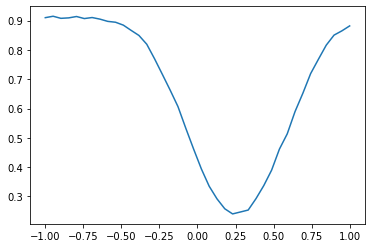

In [65]:
plt.plot(thetas,entropies)

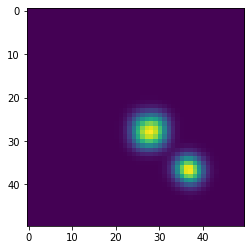

In [81]:
plt.imshow(get_kde_plot_data(full_pop))
    
    

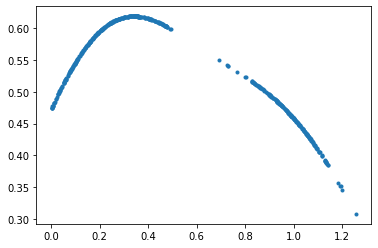

In [61]:
plt.plot(full_pop,p,".")